In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
orders= pd.read_csv('olist_orders_dataset.csv')
order_items= pd.read_csv('olist_order_items_dataset.csv')
products= pd.read_csv('olist_products_dataset.csv')

total = pd.merge(orders,order_items,how='inner')
total = pd.merge(total,products,how='inner')

total

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,1,0df37da38a30a713453b03053d60d3f7,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,2,0df37da38a30a713453b03053d60d3f7,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
112647,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,1,3d2c44374ee42b3003a470f3e937a2ea,...,55.90,15.14,instrumentos_musicais,34.0,372.0,2.0,300.0,16.0,6.0,12.0
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,ac35486adb7b02598c182c2ff2e05254,...,72.00,13.08,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0


In [14]:
total['order_purchase_date']=pd.to_datetime(total['order_purchase_timestamp']).dt.date
total['order_approved_at']=pd.to_datetime(total['order_approved_at']).dt.date
total['order_delivered_carrier_date']=pd.to_datetime(total['order_delivered_carrier_date']).dt.date
total['order_delivered_customer_date']=pd.to_datetime(total['order_delivered_customer_date']).dt.date
total['order_estimated_delivery_date']=pd.to_datetime(total['order_estimated_delivery_date']).dt.date

In [15]:
#실제 배송 기간
total['delivery_days'] = total['order_delivered_customer_date']- total['order_purchase_date']
total['delivery_days']=total['delivery_days'].dt.days

#배송 예정일 안내
total['estimated_days'] = total['order_estimated_delivery_date']-total['order_purchase_date']
total['estimated_days']=total['estimated_days'].dt.days

#순수 배달기간
total['simple_delivery_days'] = total['order_delivered_customer_date']-total['order_delivered_carrier_date']
total['simple_delivery_days']=total['simple_delivery_days'].dt.days


In [71]:
#배송완료된 주문만 분류

total = total[total['order_status']=='delivered']
total = total.dropna(how='any', axis=0)

In [72]:
total['delivery_Point_row'] = total['delivery_days'] / total['estimated_days']


In [85]:
# 배송기간이 예상 배송일의 2배 이상이면 0점, 예상배송일의 1.5~2배면 1점, 예상배송일 1~1.5배면 2점, 예상배송일 0.5~1배면 3점, 예상배송일 0.3~0.5배면 4점, 예상배송일 0.3배면 1점
#order_id	 기준 점수

total.loc[(total['delivery_Point_row'] >= 2),'delivery_Point'] = 0
total.loc[(total['delivery_Point_row'] <2)&(total['delivery_Point_row'] >=1.5),'delivery_Point'] = 1
total.loc[(total['delivery_Point_row'] <1.5)&(total['delivery_Point_row'] >=1),'delivery_Point'] = 2
total.loc[(total['delivery_Point_row'] < 1)|(total['delivery_Point_row'] <= 0.5),'delivery_Point'] = 3
total.loc[(total['delivery_Point_row'] < 0.5),'delivery_Point'] = 4
total.loc[(total['delivery_Point_row'] < 0.2),'delivery_Point'] = 5

total.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_purchase_date,delivery_days,estimated_days,simple_delivery_days,delivery_Point_row,delivery_Point
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,2017-10-02,8.0,16,6.0,0.500000,3.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15,2017-08-17,2017-08-18,2017-08-28,1,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,2017-08-15,3.0,13,1.0,0.230769,4.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02,2017-08-04,2017-08-07,2017-08-15,1,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,2017-08-02,5.0,13,3.0,0.384615,4.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25,2017-10-27,2017-11-07,2017-11-13,1,87285b34884572647811a353c7ac498a,...,500.0,19.0,8.0,13.0,2017-10-23,15.0,21,11.0,0.714286,3.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26,2018-07-26,2018-08-07,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,400.0,19.0,13.0,19.0,2018-07-24,14.0,20,12.0,0.700000,3.0


(array([  782.,     0.,  1435.,     0.,  6352.,     0., 35947.,     0.,
        55386.,  8734.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

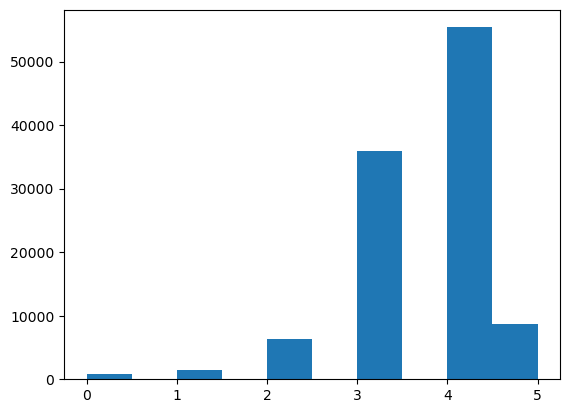

In [87]:
plt.hist(total['delivery_Point'])

### 머신러닝

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [89]:
#X,y columns 선정
df_delivery = total[['order_purchase_timestamp','delivery_days','estimated_days','simple_delivery_days','delivery_Point']]
X = df_delivery.drop(['order_purchase_timestamp','delivery_Point'],axis=1)
y = df_delivery['delivery_Point']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [99]:
#랜덤포레스트 기본값으로 실행
model =RandomForestClassifier(n_estimators=100,random_state=6)
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(y_test,pred)

print('정확도 : {0:.4f}'.format(accuracy))
print(confusion_matrix(y_test, pred))

정확도 : 0.9974
[[  149    10     0     0     0     0]
 [    3   295    21     0     0     0]
 [    0     1  1181     8     0     0]
 [    0     0     5  7285     3     0]
 [    0     0     0     2 11022     1]
 [    0     0     0     0     2  1740]]


In [100]:
#하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params= {
    'max_depth': [5, 10 , 15, 20, 25],
    'min_samples_leaf' : [1,3, 6],
    'min_samples_split' : [2,4,8]
}
model2 = GridSearchCV(model,param_grid=params, cv=2)
model2.fit(X_train,y_train)
# y_predict = model2.predict(X_test)
print('최적의 하이퍼 파라미터 : ', model2.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(model2.best_score_))

최적의 하이퍼 파라미터 :  {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도 : 0.9953


In [101]:
model_best = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_leaf=1, min_samples_split=2,random_state=6)
model_best.fit(X_train,y_train)

y_pred = model_best.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('정확도 : {0:.4f}'.format(accuracy))
print(confusion_matrix(y_test, y_pred))

정확도 : 0.9974
[[  152     7     0     0     0     0]
 [    4   289    26     0     0     0]
 [    0     2  1177    11     0     0]
 [    0     0     5  7285     3     0]
 [    0     0     0     2 11022     1]
 [    0     0     0     0     3  1739]]


In [106]:
#하이퍼 파라미터로 튜닝한 머신러닝으로 배송점수 구하기

y_best = model_best.predict(X)

delivery = pd.DataFrame({'order_purchase_timestamp': df_delivery['order_purchase_timestamp'],'delivery_score' :y_best})

delivery.to_csv('delivery_point_ver2.csv',index=False)